In [ ]:
import torch
x = torch.rand(5, 3)
print(x)

In [ ]:
type(x)

In [ ]:
x = torch.empty(5, 3)
print(x)

In [ ]:
x = torch.rand(5, 3)
print(x)

In [ ]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

In [ ]:
x = torch.tensor([5.5, 3])
print(x)

In [ ]:
x.size()[0]

In [ ]:
x = torch.zeros(9, 6, dtype=torch.float)
# reshape / resize in numpy array
x.view(3, 18)

In [3]:
import torch 
import torchvision
import torchvision.transforms as transforms

In [16]:
# transforms 對 PIL image 做處理
# transforms.Normalize(mean=(R, G, B), std=(R, G, B))
# transforms.ToTensor() changes numpy array to tensor and normalizes 0~255 to 0~1.0
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))])

trainset = torchvision.datasets.FashionMNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.FashionMNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [50]:
import torch.nn as nn
import torch.nn.functional as F


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, 3, padding = 1)
        self.conv2 = nn.Conv2d(8, 16, 3, padding = 1)
        self.conv3 = nn.Conv2d(16, 32, 3, padding = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(32 * 14 * 14, 16)
        self.fc2 = nn.Linear(16, 32)
        self.fc3 = nn.Linear(32, 64)
        self.output = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
#         x = self.pool(x)
        x = F.relu(self.conv2(x))
        x = self.pool(x)
        x = F.relu(self.conv3(x))
        x = x.view(-1, 32 * 14 * 14)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x

model = Model()

In [51]:
# model.forward(torch.rand(32, 1, 28, 28))

In [52]:
print(model)

Model(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=6272, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)


In [53]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005)

In [58]:
history = {"loss": []}

for epoch in range(15):  # loop over the dataset multiple times
    
    running_loss = 0.0
    correct = 0
    total = 0
    print(f"epoch {(epoch + 1):02d} : [", end="")
    for batch, data in enumerate(trainloader):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
        # print statistics
        running_loss += loss.item()
        if(batch % 125 == 124):
            print("=", end="")
    print('] - loss: %.3f accuracy: %.2f%%' % (running_loss / 1875, 100 * correct / total))
    history["loss"].append(running_loss / 1875)

print('Finished Training')

epoch 01 : [===============] - loss: 1.563 accuracy: 89.81%
epoch 02 : [===============] - loss: 1.560 accuracy: 90.11%
epoch 03 : [===============] - loss: 1.558 accuracy: 90.25%
epoch 04 : [===============] - loss: 1.554 accuracy: 90.67%
epoch 05 : [===============] - loss: 1.554 accuracy: 90.64%
epoch 06 : [===============] - loss: 1.551 accuracy: 91.05%
epoch 07 : [===============] - loss: 1.549 accuracy: 91.23%
epoch 08 : [===============] - loss: 1.547 accuracy: 91.41%
epoch 09 : [===============] - loss: 1.545 accuracy: 91.66%
epoch 10 : [===============] - loss: 1.545 accuracy: 91.58%
epoch 11 : [===============] - loss: 1.541 accuracy: 91.97%
epoch 12 : [===============] - loss: 1.540 accuracy: 92.03%
epoch 13 : [===============] - loss: 1.539 accuracy: 92.21%
epoch 14 : [===============] - loss: 1.538 accuracy: 92.36%
epoch 15 : [===============] - loss: 1.537 accuracy: 92.36%
Finished Training


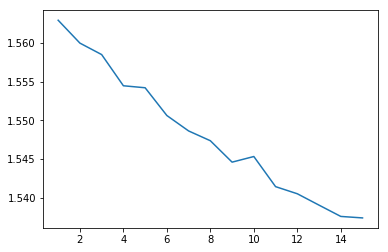

In [67]:
import matplotlib.pyplot as plt
import numpy as np 

plt.plot(np.arange(1, 16), history["loss"])

In [60]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %.2f %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 90.49 %


In [61]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 86 %
Accuracy of Trouser : 95 %
Accuracy of Pullover : 85 %
Accuracy of Dress : 88 %
Accuracy of  Coat : 86 %
Accuracy of Sandal : 94 %
Accuracy of Shirt : 65 %
Accuracy of Sneaker : 97 %
Accuracy of   Bag : 98 %
Accuracy of Ankle boot : 96 %


In [62]:
PATH = './mnist_fashion.pth'
torch.save(model.state_dict(), PATH)